<a href="https://colab.research.google.com/github/nowshaba/Intrusion-Detection/blob/main/Botnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
import sklearn.metrics as m
import keras
import tensorflow as tf
import sklearn
import tensorboard

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Avoid warnings
import warnings
warnings.filterwarnings('ignore')
#Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Import  Data
j=0
n=0
#to check whih files have both attack and normal labels
for j in range(0,65):
  df3=pd.read_csv("/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_"+str(j)+".csv")
  j+1
  for i in df3['Label']:
    if (i=='Botnet'):
      n=1
  if (n==1):
    print("n is",n, "and j is",j)

n is 1 and j is 20
n is 1 and j is 21
n is 1 and j is 22
n is 1 and j is 23
n is 1 and j is 24
n is 1 and j is 25
n is 1 and j is 26
n is 1 and j is 27
n is 1 and j is 28
n is 1 and j is 29
n is 1 and j is 30
n is 1 and j is 31
n is 1 and j is 32
n is 1 and j is 33
n is 1 and j is 34
n is 1 and j is 35
n is 1 and j is 36
n is 1 and j is 37
n is 1 and j is 38
n is 1 and j is 39
n is 1 and j is 40
n is 1 and j is 41
n is 1 and j is 42
n is 1 and j is 43
n is 1 and j is 44
n is 1 and j is 45
n is 1 and j is 46
n is 1 and j is 47
n is 1 and j is 48
n is 1 and j is 49
n is 1 and j is 50
n is 1 and j is 51
n is 1 and j is 52
n is 1 and j is 53
n is 1 and j is 54
n is 1 and j is 55
n is 1 and j is 56
n is 1 and j is 57
n is 1 and j is 58
n is 1 and j is 59
n is 1 and j is 60
n is 1 and j is 61
n is 1 and j is 62
n is 1 and j is 63
n is 1 and j is 64


In [ ]:
#much better than this is to put all the desired csv files in this case from 21 to 32 in one folder and use GLOB to put them in one df
df1 = pd.concat(
    map(pd.read_csv,["/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_20.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_21.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_22.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_23.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_24.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_25.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_26.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_27.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_28.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_29.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_30.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_31.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_32.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_33.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_34.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_35.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_36.csv"]), ignore_index=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (34,71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types.Specify dtype option on import or set low_memory=False.
  sort=sort,
/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,115,118,166,167,168,172,178,180,181,183,184,185,189,196,197,203,204,205,217,218,219,247,248,249,250) have mixed types.Specify dtype option on import or set low_memory=False.
  sort=sort,
/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99

In [ ]:
drop_cols = []
for i in df1.columns:
    if len(df1[i].unique())==1:
        drop_cols.append(i)
print("Total columns with only 1 unique value:", len(drop_cols))
df1.drop(drop_cols, 1, inplace=True)

print(df1.columns)

Total columns with only 1 unique value: 65


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Index(['frame.encap_type', 'frame.len', 'frame.number', 'frame.time',
       'frame.time_delta', 'frame.time_delta_displayed', 'frame.time_epoch',
       'frame.time_relative', 'radiotap.channel.flags.cck',
       'radiotap.channel.flags.ofdm',
       ...
       'tls.alert_message.level', 'tls.app_data_proto',
       'tls.compress_certificate.compressed_certificate_message.length',
       'tls.handshake.extension.type',
       'tls.handshake.extensions_key_share_group',
       'tls.handshake.session_ticket_length', 'tls.handshake.version',
       'tls.record.content_type', 'tls.record.version', 'Label'],
      dtype='object', length=189)


In [ ]:
df1.dropna(1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849996 entries, 0 to 849995
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   wlan.fc.subtype  849996 non-null  object
dtypes: object(1)
memory usage: 6.5+ MB


In [ ]:
#much better than this is to put all the desired csv files in this case from 21 to 32 in one folder and use GLOB to put them in one df
df2 = pd.concat(
    map(pd.read_csv,["/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_37.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_38.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_39.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_40.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_41.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_42.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_43.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_44.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_45.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_46.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_47.csv"]), ignore_index=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (71,73,77,78,79,80,93,94,96,105,115,118,119,120,121,136,137,138,139,141,143,145,146,148,149,150,151,166,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types.Specify dtype option on import or set low_memory=False.
  sort=sort,
/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (71,73,77,78,79,80,93,94,96,112,113,114,116,117,118,120,137,141,146,148,149,151,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types.Specify dtype option on import or set low_memory=False.
  sort=sort,
/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (71,73,77,78,79,80,87,93,94,96,112,113,114,116

In [ ]:
drop_cols = []
for i in df2.columns:
    if len(df2[i].unique())==1:
        drop_cols.append(i)
print("Total columns with only 1 unique value:", len(drop_cols))
df2.drop(drop_cols, 1, inplace=True)

print(df2.columns)

Total columns with only 1 unique value: 82


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Index(['frame.len', 'frame.number', 'frame.time', 'frame.time_delta',
       'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_relative',
       'radiotap.datarate', 'radiotap.dbm_antsignal', 'radiotap.length',
       ...
       'tls.alert_message.level', 'tls.app_data_proto',
       'tls.compress_certificate.compressed_certificate_message.length',
       'tls.handshake.extension.type',
       'tls.handshake.extensions_key_share_group',
       'tls.handshake.session_ticket_length', 'tls.handshake.version',
       'tls.record.content_type', 'tls.record.version', 'Label'],
      dtype='object', length=172)


In [ ]:
df2.dropna(1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549994 entries, 0 to 549993
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   frame.len                   549994 non-null  int64  
 1   frame.number                549994 non-null  int64  
 2   frame.time                  549994 non-null  object 
 3   frame.time_delta            549994 non-null  float64
 4   frame.time_delta_displayed  549994 non-null  float64
 5   frame.time_epoch            549994 non-null  int64  
 6   frame.time_relative         549994 non-null  float64
 7   radiotap.dbm_antsignal      549994 non-null  int64  
 8   radiotap.length             549994 non-null  int64  
 9   radiotap.present.tsft       549994 non-null  object 
 10  radiotap.timestamp.ts       549994 non-null  int64  
 11  wlan.duration               549994 non-null  int64  
 12  wlan.fc.ds                  549994 non-null  object 
 13  wlan.fc.frag  

In [ ]:
#much better than this is to put all the desired csv files in this case from 21 to 32 in one folder and use GLOB to put them in one df
df3 = pd.concat(
    map(pd.read_csv,["/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_48.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_49.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_50.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_51.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_52.csv"]), ignore_index=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,166,167,168,172,178,180,181,183,184,185,189,193,196,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types.Specify dtype option on import or set low_memory=False.
  sort=sort,
/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,196,197,203,204,205,215,247,248,249,250,251) have mixed types.Specify dtype option on import or set low_memory=False.
  sort=sort,
/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (71,73,77,78,79,80,86,87,93,118,166,167,168,183,184,185,189,1

In [ ]:
drop_cols = []
for i in df3.columns:
    if len(df3[i].unique())==1:
        drop_cols.append(i)
print("Total columns with only 1 unique value:", len(drop_cols))
df3.drop(drop_cols, 1, inplace=True)

print(df3.columns)

Total columns with only 1 unique value: 91


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Index(['frame.len', 'frame.number', 'frame.time', 'frame.time_delta',
       'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_relative',
       'radiotap.datarate', 'radiotap.dbm_antsignal', 'radiotap.length',
       ...
       'tls.alert_message.level', 'tls.app_data_proto',
       'tls.compress_certificate.compressed_certificate_message.length',
       'tls.handshake.extension.type',
       'tls.handshake.extensions_key_share_group',
       'tls.handshake.session_ticket_length', 'tls.handshake.version',
       'tls.record.content_type', 'tls.record.version', 'Label'],
      dtype='object', length=163)


In [ ]:
df3.dropna(1,inplace=True)
df3.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249999 entries, 0 to 249998
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   frame.len                   249999 non-null  int64  
 1   frame.number                249999 non-null  int64  
 2   frame.time                  249999 non-null  object 
 3   frame.time_delta            249999 non-null  float64
 4   frame.time_delta_displayed  249999 non-null  float64
 5   frame.time_epoch            249999 non-null  int64  
 6   frame.time_relative         249999 non-null  float64
 7   radiotap.dbm_antsignal      249999 non-null  int64  
 8   radiotap.length             249999 non-null  int64  
 9   radiotap.present.tsft       249999 non-null  object 
 10  radiotap.timestamp.ts       249999 non-null  int64  
 11  wlan.duration               249999 non-null  int64  
 12  wlan.fc.ds                  249999 non-null  object 
 13  wlan.fc.frag  

In [ ]:
#much better than this is to put all the desired csv files in this case from 21 to 32 in one folder and use GLOB to put them in one df
df4 = pd.concat(
    map(pd.read_csv,["/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_53.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_54.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_55.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_56.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_57.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_58.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_59.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_60.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_61.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_62.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_63.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/8.Botnet/Botnet_64.csv"]), ignore_index=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,120,122,137,146,148,149,151,166,167,168,169,170,171,172,173,175,176,177,181,183,184,185,189,196,197,203,204,205,215,247,248,250,251) have mixed types.Specify dtype option on import or set low_memory=False.
  sort=sort,
/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,120,136,137,138,141,142,143,145,146,148,149,151,166,167,168,178,180,183,184,185,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types.Specify dtype option on import or set low_memory=False.
  sort=sort,
/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (71,73,

In [ ]:
drop_cols = []
for i in df4.columns:
    if len(df4[i].unique())==1:
        drop_cols.append(i)
print("Total columns with only 1 unique value:", len(drop_cols))
df4.drop(drop_cols, 1, inplace=True)

print(df4.columns)
df4.dropna(1,inplace=True)
df4.info()

Total columns with only 1 unique value: 83


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Index(['frame.len', 'frame.number', 'frame.time', 'frame.time_delta',
       'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_relative',
       'radiotap.datarate', 'radiotap.dbm_antsignal', 'radiotap.length',
       ...
       'tls.alert_message.level', 'tls.app_data_proto',
       'tls.compress_certificate.compressed_certificate_message.length',
       'tls.handshake.extension.type',
       'tls.handshake.extensions_key_share_group',
       'tls.handshake.session_ticket_length', 'tls.handshake.version',
       'tls.record.content_type', 'tls.record.version', 'Label'],
      dtype='object', length=171)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  if __name__ == '__main__':


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576081 entries, 0 to 576080
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   frame.len                   576081 non-null  int64  
 1   frame.number                576081 non-null  int64  
 2   frame.time                  576081 non-null  object 
 3   frame.time_delta            576081 non-null  float64
 4   frame.time_delta_displayed  576081 non-null  float64
 5   frame.time_epoch            576081 non-null  int64  
 6   frame.time_relative         576081 non-null  float64
 7   radiotap.dbm_antsignal      576081 non-null  int64  
 8   radiotap.length             576081 non-null  int64  
 9   radiotap.present.tsft       576081 non-null  object 
 10  radiotap.timestamp.ts       576081 non-null  int64  
 11  wlan.duration               576081 non-null  int64  
 12  wlan.fc.ds                  576081 non-null  object 
 13  wlan.fc.frag  

In [ ]:
df=pd.concat([df1, df2, df3, df4], axis=0, ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226070 entries, 0 to 2226069
Data columns (total 27 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   wlan.fc.subtype             object 
 1   frame.len                   float64
 2   frame.number                float64
 3   frame.time                  object 
 4   frame.time_delta            float64
 5   frame.time_delta_displayed  float64
 6   frame.time_epoch            float64
 7   frame.time_relative         float64
 8   radiotap.dbm_antsignal      float64
 9   radiotap.length             float64
 10  radiotap.present.tsft       object 
 11  radiotap.timestamp.ts       float64
 12  wlan.duration               float64
 13  wlan.fc.ds                  object 
 14  wlan.fc.frag                float64
 15  wlan.fc.order               float64
 16  wlan.fc.moredata            float64
 17  wlan.fc.protected           float64
 18  wlan.fc.pwrmgt              float64
 19  wlan.fc.type         

In [ ]:
df.dropna(1, how = 'all', inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226070 entries, 0 to 2226069
Data columns (total 27 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   wlan.fc.subtype             object 
 1   frame.len                   float64
 2   frame.number                float64
 3   frame.time                  object 
 4   frame.time_delta            float64
 5   frame.time_delta_displayed  float64
 6   frame.time_epoch            float64
 7   frame.time_relative         float64
 8   radiotap.dbm_antsignal      float64
 9   radiotap.length             float64
 10  radiotap.present.tsft       object 
 11  radiotap.timestamp.ts       float64
 12  wlan.duration               float64
 13  wlan.fc.ds                  object 
 14  wlan.fc.frag                float64
 15  wlan.fc.order               float64
 16  wlan.fc.moredata            float64
 17  wlan.fc.protected           float64
 18  wlan.fc.pwrmgt              float64
 19  wlan.fc.type         

In [ ]:
 df.replace([np.inf, -np.inf], 0, inplace=True)
 df.fillna(0, inplace = True)
 

In [ ]:
df = df[df.Label != 0]
#to remove labels that had NaN value which was replaced by zero above.

In [ ]:
#Split dataset on train and test
from sklearn.model_selection import train_test_split
train, test=train_test_split(df,test_size=0.3, random_state=10)

#Exploratory Analysis
# Descriptive statistics
train.describe()
test.describe()
train['Label'].value_counts()
test['Label'].value_counts()

Normal    403624
Botnet      9199
Name: Label, dtype: int64

In [ ]:
#Scalling numerical attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [ ]:
from sklearn.preprocessing import OneHotEncoder 

#creating one hot encoder object 
onehotencoder = OneHotEncoder() 

trainDep = train['Label'].values.reshape(-1,1)
trainDep = onehotencoder.fit_transform(trainDep).toarray()
testDep = test['Label'].values.reshape(-1,1)
testDep = onehotencoder.fit_transform(testDep).toarray()

In [ ]:
train_X=sc_traindf
train_y=trainDep[:,0]

test_X=sc_testdf
test_y=testDep[:,0]

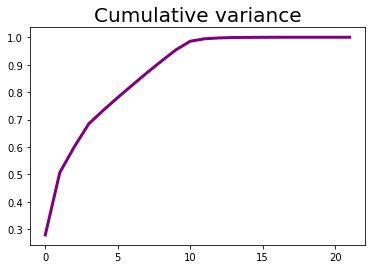

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(train_X)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#800080')
plt.title('Cumulative variance', size=20)
plt.show()

In [ ]:
Loads = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(train_X.columns) + 1)],
    index=train_X.columns
)
Loads.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
index,-0.070759,-0.996502,0.017222,-0.009536,0.002455,-0.006969,0.006918,-0.005198,-0.005034,0.004690,...,0.000361,0.001598,0.000002,-0.000544,-0.036205,-0.000046,7.071581e-07,-9.079299e-08,1.259287e-06,-4.316363e-27
frame.len,0.851004,-0.029146,0.082512,-0.094825,0.005838,-0.064032,0.072648,-0.037944,-0.005101,0.008076,...,-0.099113,0.015812,-0.000091,-0.006289,-0.000159,-0.000359,8.659951e-08,1.415780e-11,-3.807095e-13,-3.349837e-33
frame.number,-0.070759,-0.996502,0.017222,-0.009536,0.002455,-0.006969,0.006918,-0.005198,-0.005034,0.004690,...,0.000361,0.001598,0.000002,-0.000544,-0.036206,-0.000046,7.005556e-07,9.079361e-08,-1.259267e-06,4.316482e-27
frame.time_delta,-0.062964,0.027183,0.901331,0.413268,-0.002847,0.051910,-0.050576,-0.078399,0.008016,0.000696,...,-0.002913,0.000721,-0.000074,0.000141,-0.000003,0.000006,-4.123682e-09,-3.882389e-13,-2.440521e-14,7.336412e-17
frame.time_delta_displayed,-0.062964,0.027183,0.901331,0.413268,-0.002847,0.051910,-0.050576,-0.078399,0.008016,0.000696,...,-0.002913,0.000721,-0.000074,0.000141,-0.000003,0.000006,-4.123682e-09,-3.882246e-13,-2.455337e-14,-7.336412e-17


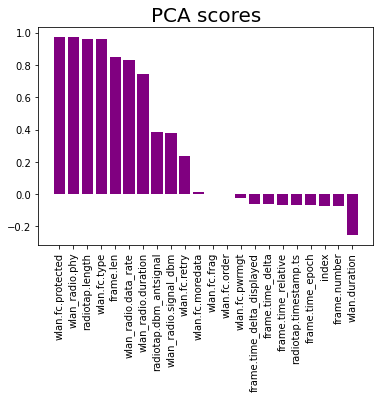

In [ ]:
pc1_Loads = Loads.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_Loads = pc1_Loads.reset_index()
pc1_Loads.columns = ['Feature', 'CorrelationtoPC1']

plt.bar(x=pc1_Loads['Feature'], height=pc1_Loads['CorrelationtoPC1'], color='#800080')
plt.title('PCA scores', size=20)
plt.xticks(rotation='vertical')
plt.show()